## Final Project Submission - Jupyter Notebook Data Cleaning

* Student name: **Dennis Trimarchi**
* Student pace: **full time**
* Scheduled project review date/time: **Not yet scheduled**
* Instructor name: **Rafael Cassaro**
* Blog post URL: **Not yet created**


## Data Cleaning

This notebook contains all of my data cleaning from the import of kc_house_data.csv file.

### Step 1 - Import a bunch of libraries

There are a bunch of libraries that are used in this project. They are imported and aliased below.

In [4]:
#Datarames and Computation
import numpy as np
import pandas as pd

#Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
#contexts available: poster, paper, talk, notebook
sns.set_context('paper')

#PICKLE for saving objects
import pickle

### Step 2 - Basic Inspection of Data

Read in the dataset from file and start to investigate basic things

In [5]:
#Read in the csv file and inspect the first few rows of data
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
#Show the datatypes and row counts for each field
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [7]:
#Quickly view some basic statistical information for each feature and the target
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**Initial Data Analysis / Thoughts**
- **id**: unique identifier for a home. Can use as index or drop and use index already in the dataframe. DROP
- **date**: convert to datetime and see if possible correlation with home price - summer vs winter maybe.
- **price**: THIS IS THE TARGET FEATURE
- **bedrooms**: likely correlation with price. Also likely to be collinear with some of the other features.
- **bathrooms**: same as above
- **sqft_living**: same as above
- **sqft_lot**: Possible correlation with price I think. Unless there are really expensive condos in the city.
- **floors**: possible correlation with price. My guess would be weak correlation.
- **waterfront**: A view to waterfront is probably correlated with price. Assumption that 0=no waterfront, 1=waterfront
- **view**: Not exactly sure what this means. Appears to be numbered from 1 to 4. Only a small portion of the records are non-zero. 
- **condition**: overall condition probably impacts price. Looks like a number from 1 to 5.
- **grade**: Can't find information online regarding the basis of the king county grading system. Will inspect data.
- **sqft_above**: likely correlation with price.
- **sqft_basement**: Not sure if having a basement at all would impact price. Depends on the real estate market in Seattle I guess.
- **yr_built**: Might have an impact on price. Median is 1975.
- **yr_renovated**: 75th percentile is zero! Seems like a lot of the homes have not been renovated, or that the data is missing.
- **zipcode**: I suspect that certain zipcodes are correlated with price. I do not know which zip codes these are. This is a categorical feature and should not be treated as continuous. Maybe the zip code prefix has a correlation with price.
- **lat**: Maybe there will be a correlation? Possibly use with longtitude to get a distance from some place.
- **long**: Maybe there will be a correlation? Possibly use with latitude to get a distance from some place. With all of the natural features in the Seattle area, this might be a waste of time.
- **sqft_living15**: probably correlated the same as sqft_living. Similar 25, 50, 75 percentiles.
- **sqft_lot15**: I don't suspect this will impact price. Similar to sqft_lot.

### Step 3: Clean up some features

- Drop ID column
- Date should be converted to datetime (decided to drop in the end because only 1 yr of data)
- Sqft Basement should be converted to a number - it is currently an object in the dataset
- Zipcode should be categorical

In [8]:
#Drop ID column as it is fine to use the default index in the dataset. I verified no duplicates.
data.drop(['id'], axis=1, inplace=True)

In [9]:
#Convert date to datetime type
data['date'] = pd.to_datetime(data['date'])

In [10]:
data['date'].describe()

count                   21597
unique                    372
top       2014-06-23 00:00:00
freq                      142
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object

Since the date is only one year of data, I am going to drop the feature.

In [11]:
#Drop date column
data.drop(['date'], axis=1, inplace=True)

Sqft Basement needs to be converted into a number. Upon initial attempt to convert, received an error because some of the rows contain "?" as a value. Will replace the ?'s with NAN and then convert the feature to a number field. 

Note: Decided later to use zero instead of NAN... making the assumption that ? meant no basement or no evidence of basement. Plus, the median value is zero.

In [12]:
#Replace ?'s with NAN or zero - I decided to assume that ?s meant no basement. I will make it zero.
data['sqft_basement'] = data['sqft_basement'].map(lambda x: 0 if x=='?' else x)

#Convert sqft_basement to a number
data['sqft_basement'] = data['sqft_basement'].astype(float)

In [13]:
data['sqft_basement'].describe()

count    21597.000000
mean       285.716581
std        439.819830
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: sqft_basement, dtype: float64

Let's take a look at **zip code:**

There are 70 unique zip codes which I do not want to use as categories. Way too many.

There are 2 unique zip code prefixes:
- 980	WA	Seattle	Bellevue, Auburn, areas around Seattle
- 981	WA	Seattle	SEATTLE

Below, I create a categorical variable: zip_981 that represents 981 Seattle City zip codes.

In [14]:
#See number of unique zip codes
print("Unique zip codes: {}".format(data['zipcode'].nunique()))

#See number of unique zip prefixes
print("Zip code prefixes and value counts")
zip_prefix = data['zipcode']//100
print(zip_prefix.value_counts())

#Create new feature zip_981 based on zipcode prefix
data['zip_981'] = data['zipcode'].apply(lambda x: 1 if x//100 == 981 else 0)

Unique zip codes: 70
Zip code prefixes and value counts
980    12624
981     8973
Name: zipcode, dtype: int64


**Below is a map of the area with price represented by color.**

Lat and Long are used as our axis variables.

Text(0.5, 1.0, 'Price by Geographical Area')

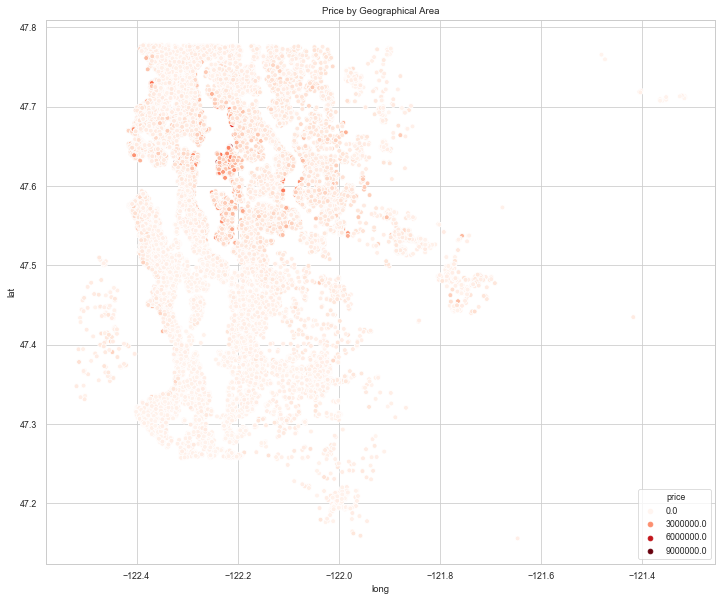

In [15]:
plt.figure(figsize=(12,10))
sns.scatterplot(data['long'], data['lat'], hue=data['price'], palette='Reds')
plt.legend(loc='lower right')
plt.title("Price by Geographical Area")

This figure is cool. The darker areas represent higher prices. It looks as though areas around and east of Lake Washington are darker. In particular, Bellvue, WA is dark in this figure. The southern part of the county appears to have lower prices in general.

### Step 4: Inspect the data for outliers, NaN and remove / replace as needed

Slice and dice the data

Ok... now that all of the features are the proper data types. Let's look at the features histograms and their scatter against the price (target). This will help to identify outliers.

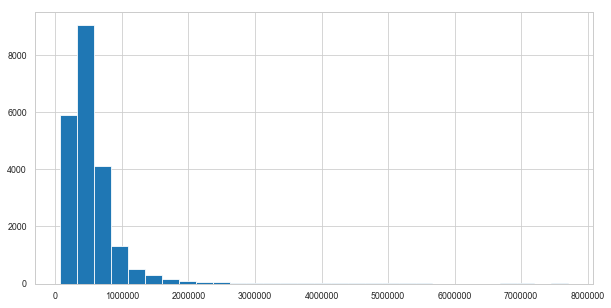

In [16]:
#Check histogram of prices to see if normally distributed
data['price'].hist(figsize=(10,5),bins=30)

The price is skewed with a tail on the high end. Recall that max is 7.7M but 75%ile is 645k. 
**Decision:** Remove prices above 2.0Mil.

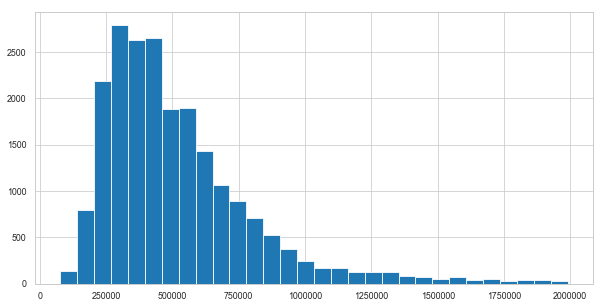

In [17]:
data = data.loc[data['price']<2000000]
data['price'].hist(figsize=(10,5),bins=30)

Looks much better. It is still skewed but more balanced than before. The mean is closer to the median than it was.

#### Revisit Geography plot

Text(0.5, 1.0, 'Price by Geographical Area')

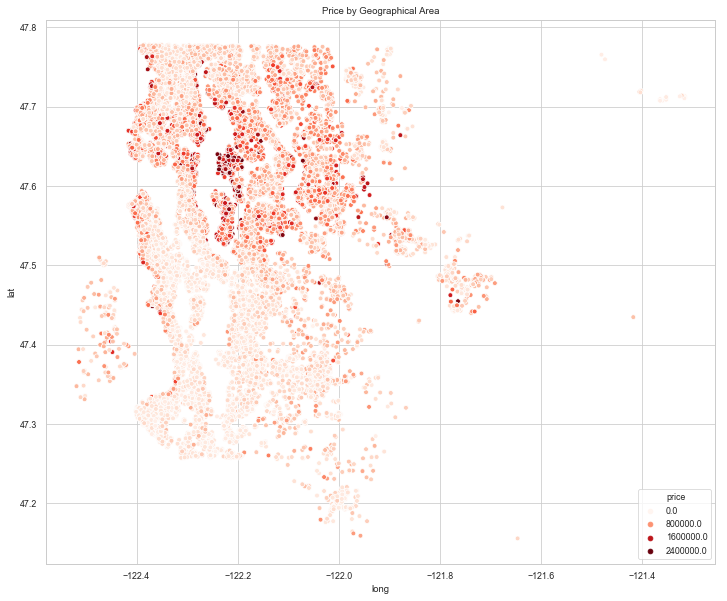

In [18]:
plt.figure(figsize=(12,10))
sns.scatterplot(data['long'], data['lat'], hue=data['price'], palette='Reds')
plt.legend(loc='lower right')
plt.title("Price by Geographical Area")

Even cooler than before. The dark areas are more pronounced. It looks like areas directly east of Seattle are more expensive.

#### Scatter and histogram of each feature

In [19]:
#define a function that will provide a couple plots for a feature - histogram and scatter
def feature_plots(feature,target,df):
    """
    Creates a histogram of the desired feature and a scatter plot of the target vs. the feature.
    feature = feature (column) name.
    target = target (column) name.
    df = dataframe containing both the feature and target
    returns nothing
    """
    #Print feature name to screen
    print(feature)
    
    #Histogram using sns distplot
    plt.title("{} histogram".format(feature))
    sns.distplot(df[feature])
    plt.show()
    
    #Scatter Plot using sns lmplot
    sns.lmplot(x=feature, y=target, data=df, line_kws={'color': 'red'})
    plt.title("{} vs {}".format(target, feature))
    plt.show()
    
    pass

**I continually ran the code below to display new plots after each feature was cleaned** 

Removed outliers and ran again. The Python code showing removal of outliers is after the plots.

In [38]:
#List of feature names to run histograms and scatterplots on to check for outliers
feature_names = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                 'condition', 'grade', 'sqft_above', 'yr_built',
                 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'has_basement']

bedrooms


/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


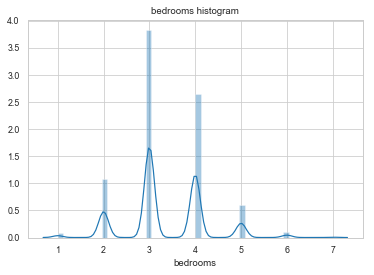

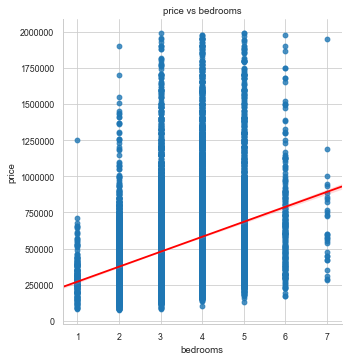

bathrooms


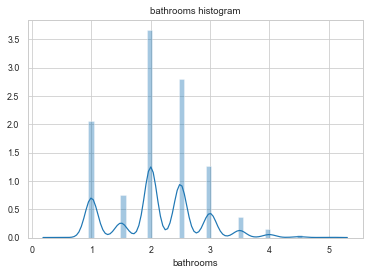

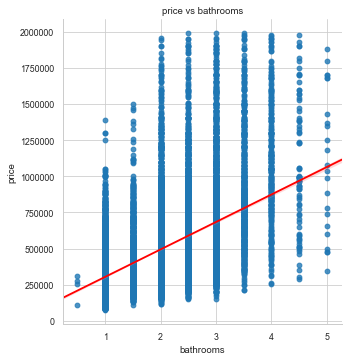

sqft_living


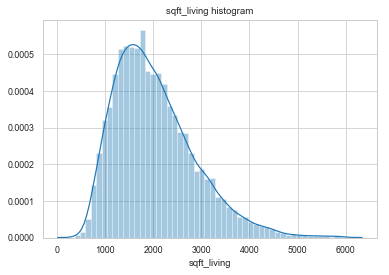

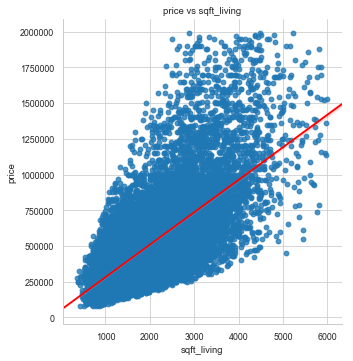

sqft_lot


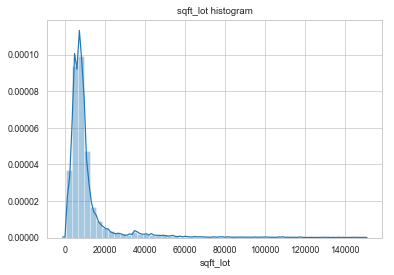

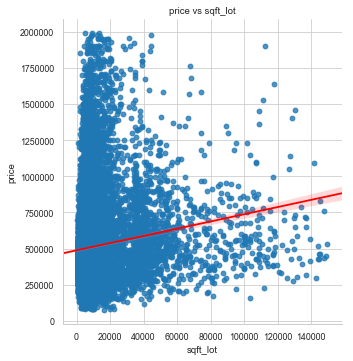

floors


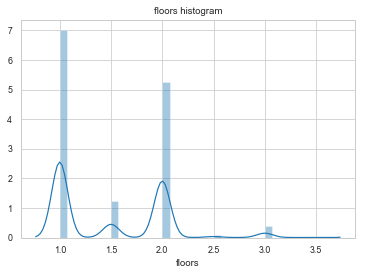

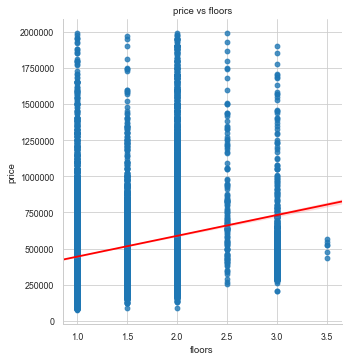

condition


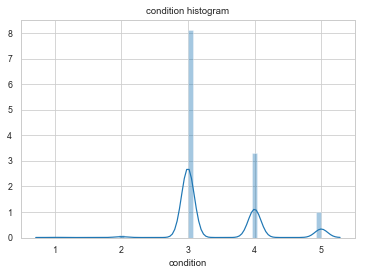

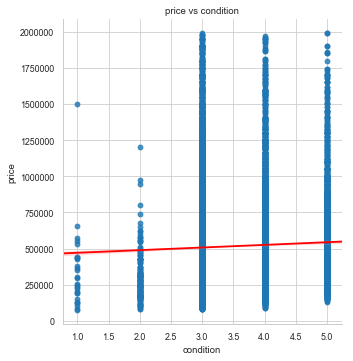

grade


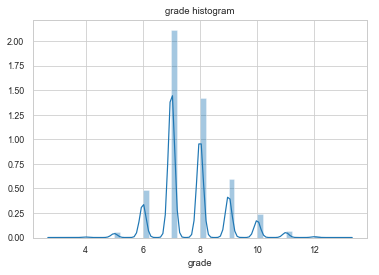

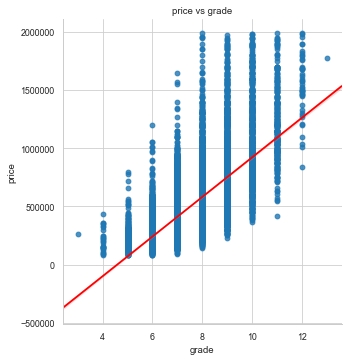

sqft_above


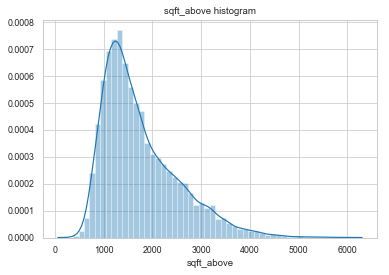

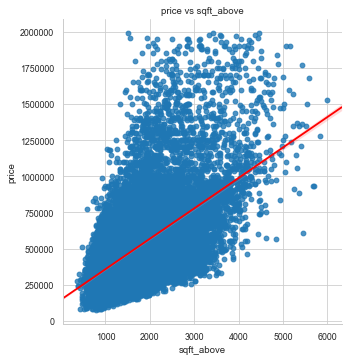

yr_built


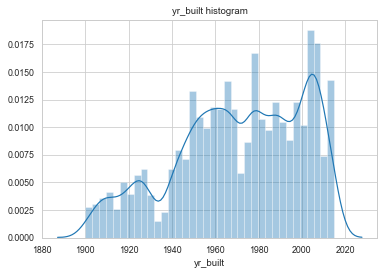

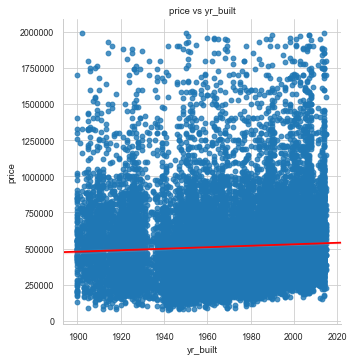

yr_renovated


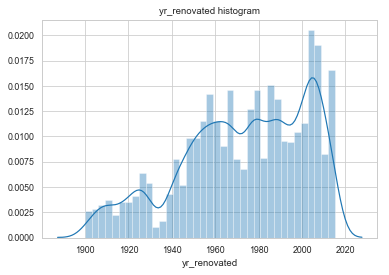

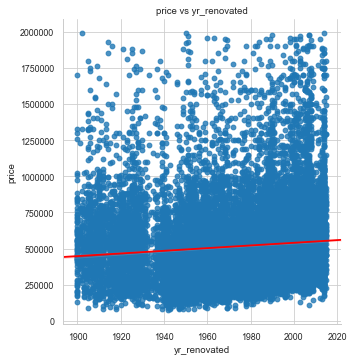

sqft_living15


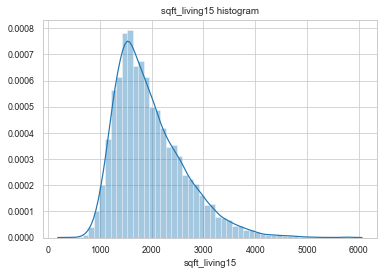

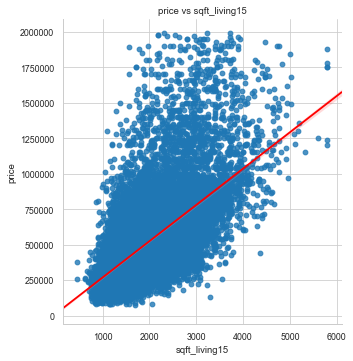

sqft_lot15


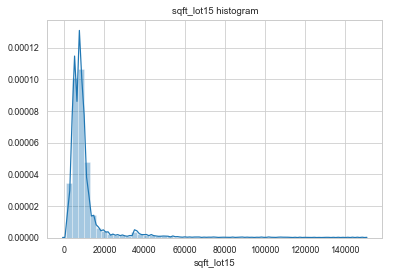

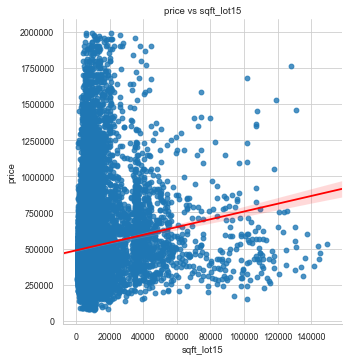

has_basement


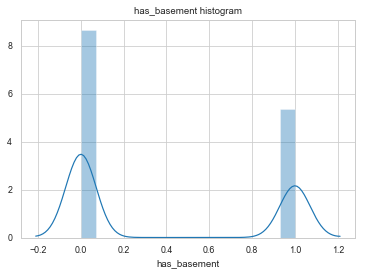

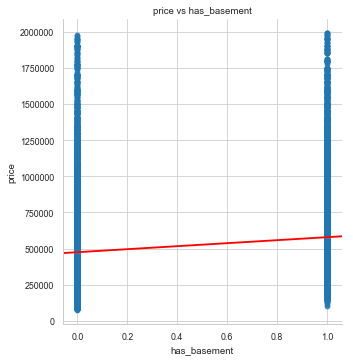

In [39]:
#plot the features in a histogram and scatter w/ target
for feature in feature_names:
    feature_plots(feature, 'price', data)


In [27]:
#Bathrooms -  >5 looked like outliers (21 rows removed)
data = data.loc[data['bathrooms']<=5]

#Bathrooms - also decided to round to nearest 0.5 bathroom. Not sure what 0.25 or 0.75 of a bathroom is anyway
data['bathrooms'] = np.round(2*data['bathrooms'],0)/2

In [28]:
#View - over 90% of the data has zero as the value. Will drop this column. 
#Not sure exatly what > 1 means for "has been viewed"
data.drop('view', axis=1, inplace=True)

In [29]:
#Bedrooms - One clear outlier at 33 bedrooms. Definitely remove that one.
#Decided to remove records with bedrooms >= 8 (keep <8). This is only 20 records.
data = data.loc[data['bedrooms']<8]

In [30]:
#Basement - almost all records are zero. Basement sizes other than zero follow a normal distribution.
#Decision, make this a categorical variable for "has_basement" (1=yes, 0=no)
data['has_basement'] = data['sqft_basement'].apply(lambda x: 1 if x>0 else 0)

#Drop original sqft_basement feature
data.drop('sqft_basement', axis=1, inplace=True)

In [31]:
#Waterfront - Almost all records are 0. Only 101 records have a 1.0 for waterfront.
#Unfortunately there are 2354 records that are NaN.
data['waterfront'].isna().sum()

2354

Text(0.5, 1.0, 'Price by Geographical Area for records where WATERFRONT Feature is NAN')

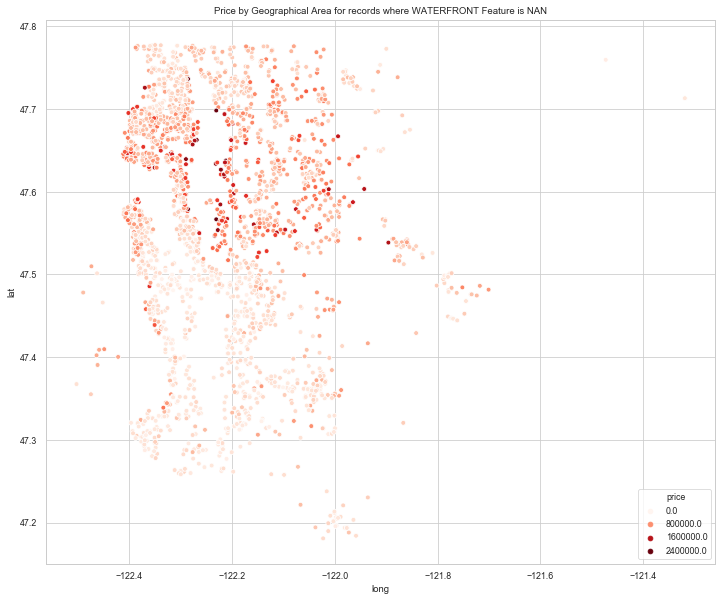

In [32]:
#Checking map for distribution of NaN records for waterfront. They seem to be scattered all over.
#Both waterfront and not. Of course they could be near the water but not waterfront.
small_df = data[data['waterfront'].isnull()]
plt.figure(figsize=(12,10))
sns.scatterplot(small_df['long'], small_df['lat'], hue=small_df['price'], palette='Reds')
plt.legend(loc='lower right')
plt.title("Price by Geographical Area for records where WATERFRONT Feature is NAN")

In [33]:
#Waterfront - Almost all records are 0. Only 101 records to use for waterfront.
#Decision to make NaN values = 0 as it is a solid assumption I believe.
#Decision to drop column, but will keep for analysis in my questions notebook. - it was in one of my questions.
data['waterfront'] = data['waterfront'].fillna(0)
data['waterfront'] = data['waterfront'].astype(int)
data['waterfront'].value_counts()

0    21247
1      101
Name: waterfront, dtype: int64

In [34]:
#Year Renovated - only 713 records have a non-zero value. Not sure what constitutes "renovated"
#I would expect older homes to have been renovated but newer ones to have not.

#Decision: Update yr_renovated to be: yr_renovated OR yr_built, whichever is greater.

#Fill NAN in yr_renovated with yr_built - last known renovation is when built
data['yr_renovated'] = data['yr_renovated'].fillna(data['yr_built'])

#Update yr_renovated with newest of yr_built or yr_renovated
data['yr_renovated'] = data.apply(
    lambda x: 
    x.yr_built if (x.yr_built > x.yr_renovated) else x.yr_renovated, 
    axis=1)

In [35]:
#Square Foot Lot - decided to remove outliers where square footage is greater than 150,000 which is 332 records
data = data.loc[data['sqft_lot'] < 150000]

#Square Foot Lot 15 - decided to remove outliers where square footage is greater than 150,000
data = data.loc[data['sqft_lot15'] < 150000]

In [36]:
#Square Foot Living - remove > 6000 which is only 12 records (after my other data slicing)
data = data.loc[data['sqft_living']<6000]

sqft_lot has an interesting scatterplot. It almost looks like there are two things going on.
Price goes up with a larger lot, but there appear to be two separate fit lines. It might be an urban vs rural thing.

**Last check to make sure Nulls are gone**

In [40]:
print(data.shape)
data.isna().sum()

(20963, 19)


price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
zip_981          0
has_basement     0
dtype: int64

Removed 634 rows in total during data cleaning.

### Step 5: Save dataframe for use in other notebooks

* **Questions** notebook
* More **EDA** and **Modeling** Notebook

#### Pickle my DataFrame!

In [41]:
#Import library
import pickle

#Write data to file
with open('data.pickle','wb') as f:
    pickle.dump(data,f,pickle.HIGHEST_PROTOCOL)

In [42]:
#Verify that pickle worked
with open('data.pickle','rb') as f_read:
    data_from_pickle = pickle.load(f_read)

In [43]:
print(data_from_pickle.shape)
data_from_pickle.head()

(20963, 19)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zip_981,has_basement
0,221900.0,3,1.0,1180,5650,1.0,0,3,7,1180,1955,1955.0,98178,47.5112,-122.257,1340,5650,1,0
1,538000.0,3,2.0,2570,7242,2.0,0,3,7,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,1
2,180000.0,2,1.0,770,10000,1.0,0,3,6,770,1933,1933.0,98028,47.7379,-122.233,2720,8062,0,0
3,604000.0,4,3.0,1960,5000,1.0,0,5,7,1050,1965,1965.0,98136,47.5208,-122.393,1360,5000,1,1
4,510000.0,3,2.0,1680,8080,1.0,0,3,8,1680,1987,1987.0,98074,47.6168,-122.045,1800,7503,0,0


## APPENDIX: Original Histogram and Scatterplots before dropping outliers

In [23]:
#ist of feature names to run histograms and scatterplots on to check for outliers
feature_names = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                 'condition', 'grade', 'sqft_above', 'yr_built',
                 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'sqft_basement']

bedrooms


/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


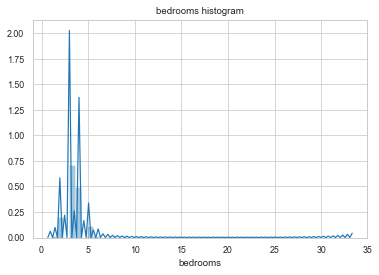

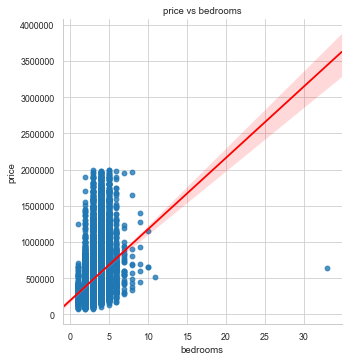

bathrooms


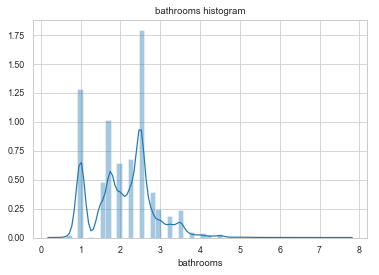

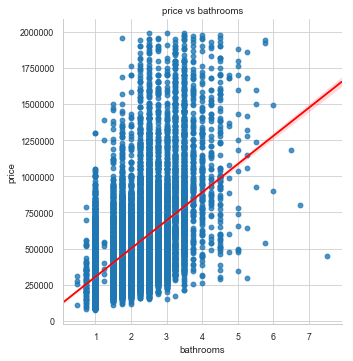

sqft_living


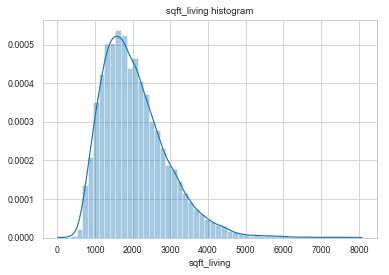

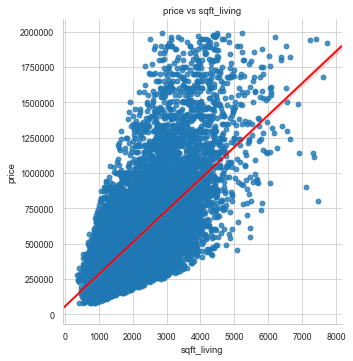

sqft_lot


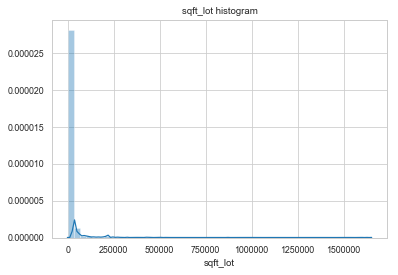

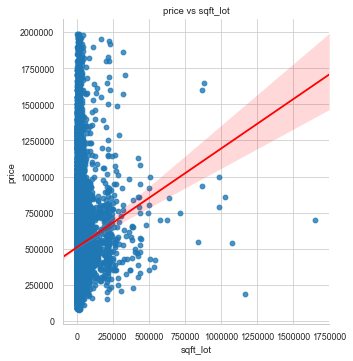

floors


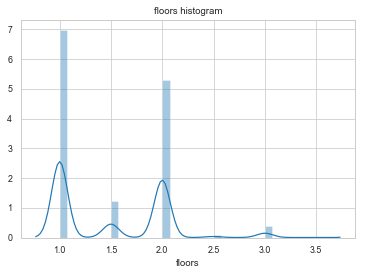

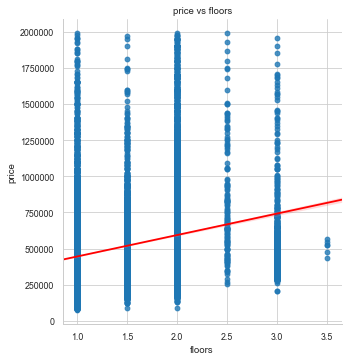

condition


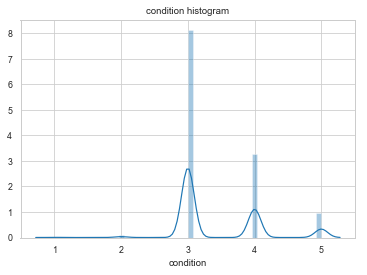

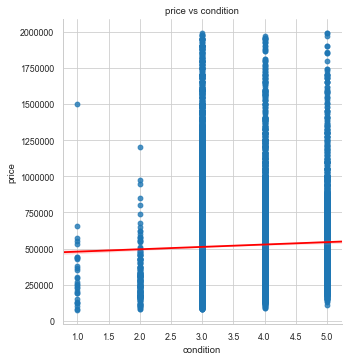

grade


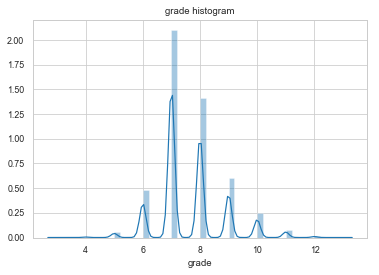

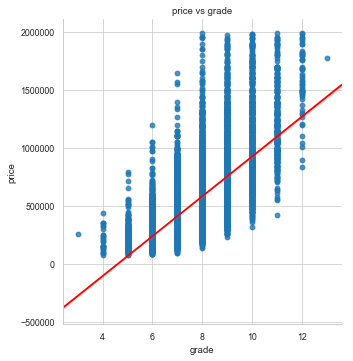

sqft_above


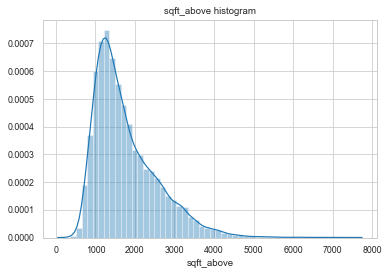

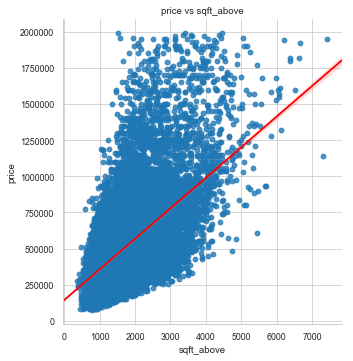

yr_built


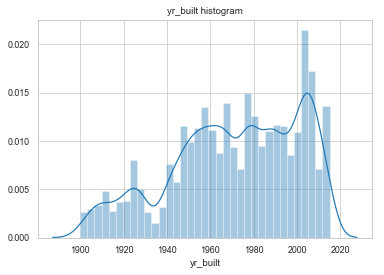

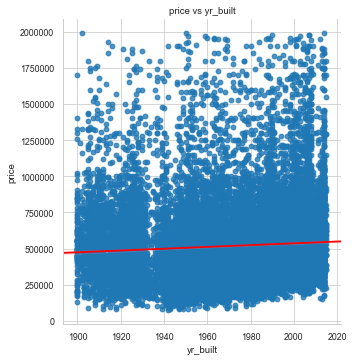

yr_renovated


/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


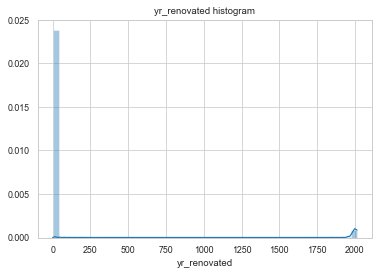

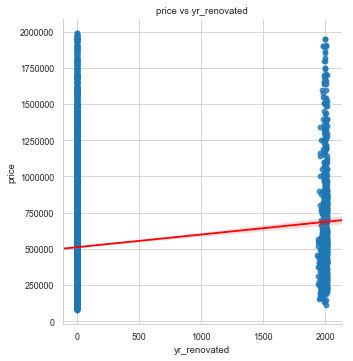

sqft_living15


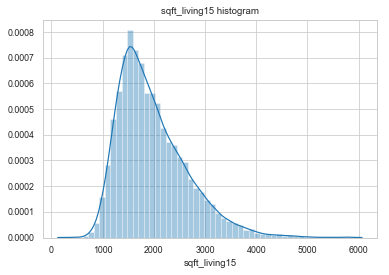

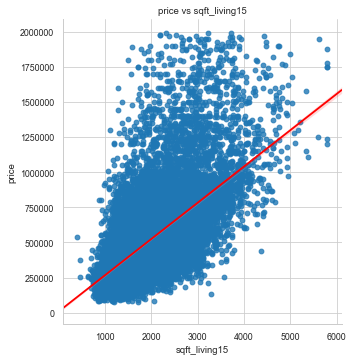

sqft_lot15


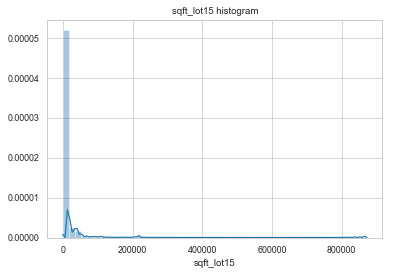

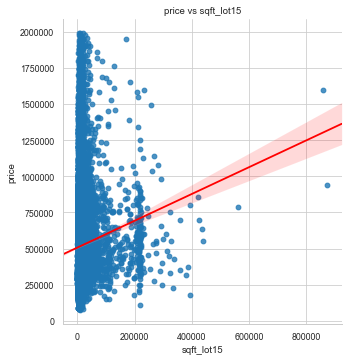

sqft_basement


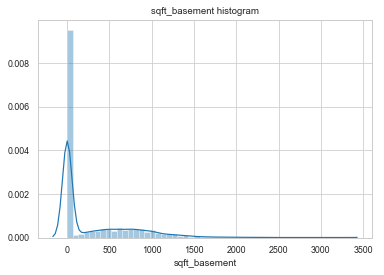

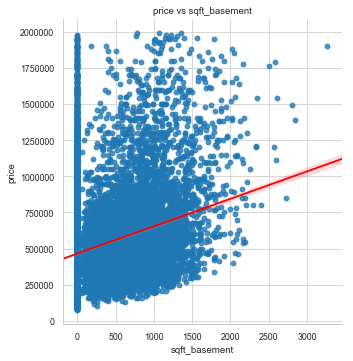

In [24]:
#plot the features in a histogram and scatter w/ target
for feature in feature_names:
    feature_plots(feature, 'price', data)